Imports

In [289]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import trapz
import math
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import skimage.measure
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.filters import threshold_otsu
from scipy import stats
from skimage import io, measure
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import chisquare
from sklearn.ensemble import RandomForestClassifier

Directory Functions

Combined Folders

Control Combined

In [185]:

#set the path to the folder containing the txt files
dir_path = '../PARKINSON_HW/hw_dataset/control/'


df_list = []

#loop through the files in the folder
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        #
        df = pd.read_csv(os.path.join(dir_path, filename), delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        #append  to the list
        df_list.append(df)


Control_result = pd.concat(df_list, ignore_index=True)



Control_result = Control_result.drop(Control_result[Control_result['Pressure'] == 0].index, axis=0)
Control_result = Control_result.drop(Control_result[Control_result['Z'] == 0].index, axis=0)
print(Control_result)
print(sum(Control_result["Z"])/4000)
print(sum(Control_result["Pressure"])/4000)
print(sum(Control_result["GripAngle"])/4000)

          X    Y   Z  Pressure  GripAngle   Timestamp  TestID
22      205  198  12       597        890  1732647455       0
164     171  194  12       763        910  1732648454       0
167     170  194  12       761        920  1732648475       0
173     168  197  12       765        910  1732648517       0
187     165  203  12       767        920  1732648616       0
...     ...  ...  ..       ...        ...         ...     ...
118698  395  229  12       579       1420    17580512       1
118702  395  225  12       582       1430    17580540       1
118704  395  223  12       582       1430    17580554       1
118705  395  221  12       581       1430    17580562       1
118707  395  220  12       582       1440    17580576       1

[4000 rows x 7 columns]
12.591
848.19025
1068.415


Parkinson Combined

In [184]:


#set the path to the directory containing the txt files
dir_path = '../PARKINSON_HW/hw_dataset/parkinson/'


df_list = []

#loop through the files in the folder
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        #
        df = pd.read_csv(os.path.join(dir_path, filename), delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        #append  to the list
        df_list.append(df)

Parkinson_result = pd.concat(df_list, ignore_index=True)

Parkinson_result = Parkinson_result.drop(Parkinson_result[Parkinson_result['Pressure'] == 0].index, axis=0)
Parkinson_result = Parkinson_result.drop(Parkinson_result[Parkinson_result['Z'] == 0].index, axis=0)

print(Parkinson_result)
print(sum(Parkinson_result["Z"])/9393)
print(sum(Parkinson_result["Pressure"])/9393)
print(sum(Parkinson_result["GripAngle"])/9393)

          X    Y   Z  Pressure  GripAngle  Timestamp  TestID
51      211  208  12       645       1430    1352175       0
52      211  208  12       655       1430    1352184       0
54      211  209  12       648       1430    1352202       0
57      211  210  12       647       1420    1352229       0
152     259  213  12       839       1570    1353085       0
...     ...  ...  ..       ...        ...        ...     ...
200946  401  204  12       647       1050    4069474       1
200960  401  204  12       634       1020    4069600       1
200970  401  204  12       636       1040    4069690       1
200976  401  204  12       622       1050    4069744       1
200979  401  204  12       616       1040    4069771       1

[9393 rows x 7 columns]
12.519961673586714
648.2762695624401
1101.2519961673586


Indivdual Files

In [84]:
def process_file(txt_dir):
    
    for filename in os.listdir(txt_dir):
        
        if filename.endswith('.txt'):
            
            filepath = os.path.join(txt_dir, filename)
            df = pd.read_csv(filepath, delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
            df = df.drop(df[df['Pressure'] == 0].index, axis=0)
            df = df.drop(df[df['Z'] == 0].index, axis=0)
            answer.append( action(df))
    return answer

   
    

Area Under The Curve

Control

In [85]:
answer = []
def action(df):    
                distances = []
                for i in range(len(df)):
                        x, y = df.iloc[i]['X'], df.iloc[i]['Y']
                        distance = np.sqrt(x**2 + y**2)
                        distances.append(distance)

                #the trapezoid rule to calculate the area under the curve defined by the spiral
                area = trapz(distances, dx=1)
                
                return area

In [86]:
Control_area = process_file('../PARKINSON_HW/hw_dataset/control/')
print(f"The total average area under the curve of the spiral : {sum(Control_area )/len(Control_area )}")



The total average area under the curve of the spiral : 84852.46886145238


<function matplotlib.pyplot.show(close=None, block=None)>

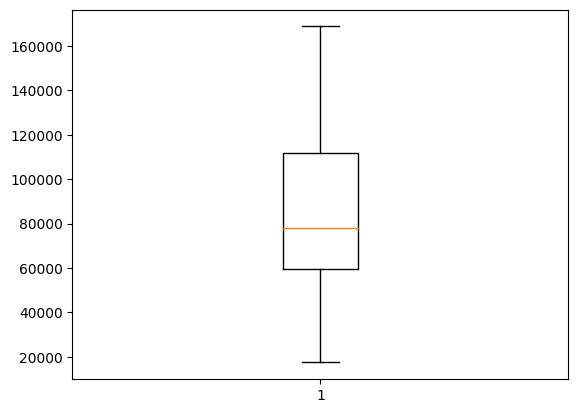

In [87]:
plt.boxplot(Control_area)
plt.show

Parkinson

In [88]:
PD_area = process_file('../PARKINSON_HW/hw_dataset/parkinson/')
print(f"The total average area under the curve of the spiral : {sum(PD_area)/len(PD_area)}")



The total average area under the curve of the spiral : 113913.92838801371


<function matplotlib.pyplot.show(close=None, block=None)>

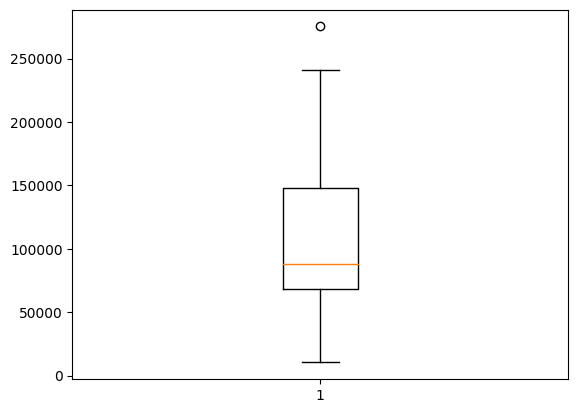

In [89]:
plt.boxplot(PD_area)
plt.show

Length of Line

Control

In [90]:

txt_dir = '../PARKINSON_HW/hw_dataset/control/'
distances = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

#calculate the distances between points

        for i in range(1, len(df)):
            x1, y1 = df.iloc[i-1]['X'],df.iloc[i-1]['Y']
            x2, y2 = df.iloc[i]['X'], df.iloc[i]['Y']
            distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
            distances.append(distance)


        total_length = sum(distances)
        avg_length = total_length/len(distances)
#add up the distances to get the total length of the spiral

print("Total length of spiral:", total_length)
print("Average length of spiral:", avg_length)



Total length of spiral: 54438.53809136762
Average length of spiral: 13.660862758185099


Parkinson

In [91]:

txt_dir = '../PARKINSON_HW/hw_dataset/parkinson/'
distances = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

#calculate the distances between points

        for i in range(1, len(df)):
            x1, y1 = df.iloc[i-1]['X'],df.iloc[i-1]['Y']
            x2, y2 = df.iloc[i]['X'], df.iloc[i]['Y']
            distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
            distances.append(distance)


        total_length = sum(distances)
        avg_length = total_length/len(distances)
#add up the distances to get the total length of the spiral

print("Total length of spiral:", total_length)
print("Average length of spiral:", avg_length)



Total length of spiral: 99409.46382202474
Average length of spiral: 10.611599468619207


Smoothness 

Control 

In [92]:
txt_dir = '../PARKINSON_HW/hw_dataset/control/'
Smooth = []
avg_dis = []
avg_std = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

        distances = np.sqrt((df['X'].diff() ** 2) + (df['Y'].diff() ** 2))

#Avergae distance
        avg_distance = distances.mean()

#STD Distance
        std_distance = distances.std()

#Regularity score = to average distance / std distance
        regularity_score = avg_distance / std_distance
        Smooth.append(regularity_score)
        avg_dis.append(avg_distance)
        avg_std.append(std_distance)


        print(f"Average distance: {avg_distance:.2f}")
        print(f"Standard deviation of distances: {std_distance:.2f}")
        print(f"Regularity score: {regularity_score:.2f}")
print(sum(Smooth)/len(Smooth))
print(sum(avg_dis)/len(avg_dis))
print(sum(avg_std)/len(avg_std))

Average distance: 14.34
Standard deviation of distances: 28.21
Regularity score: 0.51
Average distance: 10.57
Standard deviation of distances: 20.07
Regularity score: 0.53
Average distance: 8.94
Standard deviation of distances: 19.98
Regularity score: 0.45
Average distance: 10.08
Standard deviation of distances: 22.99
Regularity score: 0.44
Average distance: 19.82
Standard deviation of distances: 38.58
Regularity score: 0.51
Average distance: 14.30
Standard deviation of distances: 26.27
Regularity score: 0.54
Average distance: 14.68
Standard deviation of distances: 28.10
Regularity score: 0.52
Average distance: 14.46
Standard deviation of distances: 36.74
Regularity score: 0.39
Average distance: 18.47
Standard deviation of distances: 45.00
Regularity score: 0.41
Average distance: 8.21
Standard deviation of distances: 20.89
Regularity score: 0.39
Average distance: 9.27
Standard deviation of distances: 23.70
Regularity score: 0.39
Average distance: 18.77
Standard deviation of distances: 

Parkinson

In [93]:
txt_dir = '../PARKINSON_HW/hw_dataset/parkinson/'
Smooth = []
avg_dis = []
avg_std = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

        distances = np.sqrt((df['X'].diff() ** 2) + (df['Y'].diff() ** 2))

#Avergae distance
        avg_distance = distances.mean()

#STD Distance
        std_distance = distances.std()

#Regularity score = to average distance / std distance
        regularity_score = avg_distance / std_distance
        Smooth.append(regularity_score)
        avg_dis.append(avg_distance)
        avg_std.append(std_distance)


        print(f"Average distance: {avg_distance:.2f}")
        print(f"Standard deviation of distances: {std_distance:.2f}")
        print(f"Regularity score: {regularity_score:.2f}")
print(sum(Smooth)/len(Smooth))
print(sum(avg_dis)/len(avg_dis))
print(sum(avg_std)/len(avg_std))

Average distance: 70.34
Standard deviation of distances: 82.29
Regularity score: 0.85
Average distance: 17.01
Standard deviation of distances: 33.94
Regularity score: 0.50
Average distance: 10.11
Standard deviation of distances: 22.44
Regularity score: 0.45
Average distance: 6.11
Standard deviation of distances: 14.64
Regularity score: 0.42
Average distance: 11.38
Standard deviation of distances: 25.14
Regularity score: 0.45
Average distance: 5.83
Standard deviation of distances: 14.28
Regularity score: 0.41
Average distance: 7.63
Standard deviation of distances: 17.24
Regularity score: 0.44
Average distance: 7.77
Standard deviation of distances: 19.06
Regularity score: 0.41
Average distance: 13.60
Standard deviation of distances: 29.05
Regularity score: 0.47
Average distance: 24.04
Standard deviation of distances: 48.47
Regularity score: 0.50
Average distance: 12.58
Standard deviation of distances: 27.45
Regularity score: 0.46
Average distance: 17.01
Standard deviation of distances: 3

Symmetry

Control

Symmetry score: 1.0428243826430745
Symmetry score: 1.0098422777233376
Symmetry score: 1.1272954190135074
Symmetry score: 1.4539339882795703
Symmetry score: 1.0699309475225276
Symmetry score: 1.006835562767304
Symmetry score: 1.011008693462949
Symmetry score: 1.271927835356696
Symmetry score: 1.0097353976534378
Symmetry score: 1.0610964683127797
Symmetry score: 1.3656376710745828
Symmetry score: 1.0331755566647236
Symmetry score: 2.181847006512898
Symmetry score: 1.8047224651846505
Symmetry score: 1.0185912824171333
1.2312269969726115


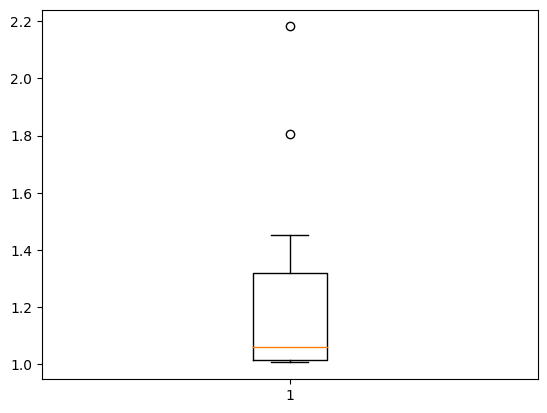

In [94]:
txt_dir = '../PARKINSON_HW/hw_dataset/control/'
avg_sym = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

        df = df.assign(theta=np.arctan2(df['Y'], df['X']))
        #Distance each point is from the center
        x_mean = df['X'].mean()
        y_mean = df['Y'].mean()
        df['dist'] = np.sqrt((df['X'] - x_mean) ** 2 + (df['Y'] - y_mean) ** 2)

        # Calculate the average distance for each quarter turn
        quarter_turns = np.linspace(0, 1.5 * np.pi, num=7)
        quarter_distances = []
        for i in range(len(quarter_turns) - 1):
            start = quarter_turns[i]
            end = quarter_turns[i+1]
            subset = df[(df['theta'] >= start) & (df['theta'] < end)]
            quarter_distances.append(subset['dist'].mean())

# Calculate the symmetry score as the ratio of the maximum and minimum quarter distances
        symmetry_score = max(quarter_distances) / min(quarter_distances)
        avg_sym.append(symmetry_score )
        print("Symmetry score:", symmetry_score)
print(sum(avg_sym)/len(avg_sym))
plt.boxplot(avg_sym)
plt.show()

Parkinson

Symmetry score: 1.78285234442677
Symmetry score: 1.2957301829025334
Symmetry score: 1.4169161090777305
Symmetry score: 1.296266956579583
Symmetry score: 1.4616274482711868
Symmetry score: 1.0519062803116972
Symmetry score: 1.1502490338698559
Symmetry score: 1.2265426706935385
Symmetry score: 1.22373146465125
Symmetry score: 1.047990516623854
Symmetry score: 1.0480025108861286
Symmetry score: 1.3933298292854845
Symmetry score: 1.0939639845322011
Symmetry score: 1.0154466225691308
Symmetry score: 1.0046552575408072
Symmetry score: 1.1772423049776977
Symmetry score: 1.1320303031047316
Symmetry score: 1.4054621917553478
Symmetry score: 1.6319408568897698
Symmetry score: 1.5172625182306376
Symmetry score: 1.8470914963132732
Symmetry score: 1.453990235435062
Symmetry score: 1.696452564956425
Symmetry score: 1.0342257446955165
Symmetry score: 1.0014797370245834
1.2962555666241915


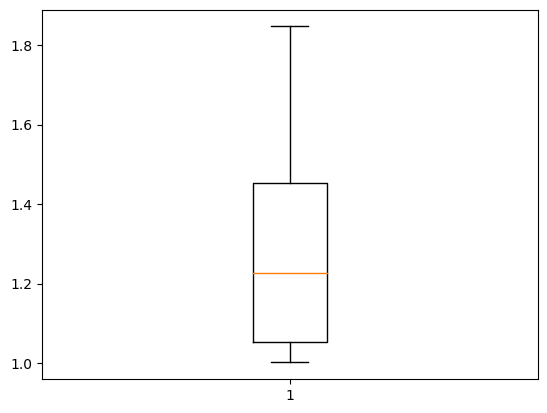

In [95]:
txt_dir = '../PARKINSON_HW/hw_dataset/parkinson/'
avg_sym = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)

        df = df.assign(theta=np.arctan2(df['Y'], df['X']))
        # Calculate the distance of each point from the center
        x_mean = df['X'].mean()
        y_mean = df['Y'].mean()
        df['dist'] = np.sqrt((df['X'] - x_mean) ** 2 + (df['Y'] - y_mean) ** 2)

        # Calculate the average distance for each quarter turn
        quarter_turns = np.linspace(0, 1.5 * np.pi, num=7)
        quarter_distances = []
        for i in range(len(quarter_turns) - 1):
            start = quarter_turns[i]
            end = quarter_turns[i+1]
            subset = df[(df['theta'] >= start) & (df['theta'] < end)]
            quarter_distances.append(subset['dist'].mean())

# Calculate the symmetry score as the ratio of the maximum and minimum quarter distances
        symmetry_score = max(quarter_distances) / min(quarter_distances)
        avg_sym.append(symmetry_score )
        print("Symmetry score:", symmetry_score)
print(sum(avg_sym)/len(avg_sym))
plt.boxplot(avg_sym)
plt.show()

Number of Turns

Control

176.0


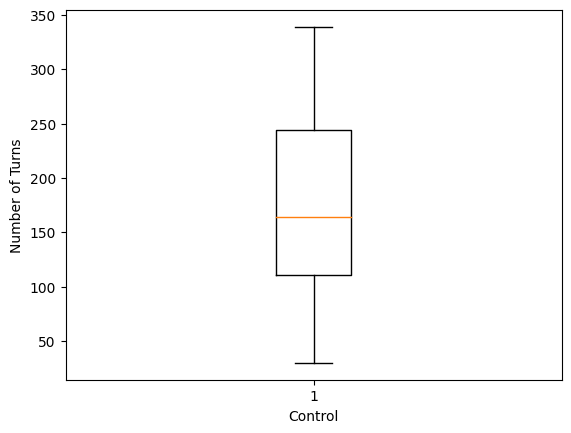

In [96]:
txt_dir = '../PARKINSON_HW/hw_dataset/control/'
turn_avg = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)


    x = df['X'].values
    y = df['Y'].values

#finding the angle
    dx = np.diff(x)
    dy = np.diff(y)
    theta = np.arctan2(dy, dx)

#Computeing the difference using the angle and sign so if postive or negative
    dtheta = np.diff(theta)
    signed_dtheta = np.sign(dtheta)

#Counts how much the sign is negative or postive
    turns = (signed_dtheta[1:] - signed_dtheta[:-1] != 0).sum()
    turn_avg.append(turns)

    
print(sum(turn_avg)/len(turn_avg))
plt.xlabel("Control")
plt.ylabel("Number of Turns")
plt.boxplot(turn_avg)
plt.show()


Parkinson

236.04


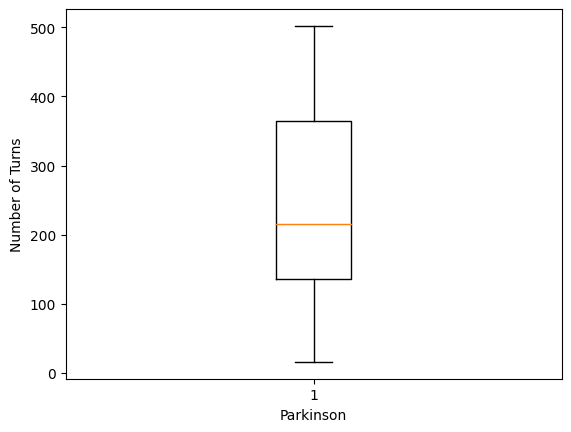

In [97]:
txt_dir = '../PARKINSON_HW/hw_dataset/parkinson/'
turn_avg = []
for filename in os.listdir(txt_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';',  names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
        df = df.drop(df[df['Pressure'] == 0].index, axis=0)
        df = df.drop(df[df['Z'] == 0].index, axis=0)


    x = df['X'].values
    y = df['Y'].values

#finding the angle
    dx = np.diff(x)
    dy = np.diff(y)
    theta = np.arctan2(dy, dx)

#Computeing the difference using the angle and sign so if postive or negative
    dtheta = np.diff(theta)
    signed_dtheta = np.sign(dtheta)

#Counts how much the sign is negative or postive
    turns = (signed_dtheta[1:] - signed_dtheta[:-1] != 0).sum()
    turn_avg.append(turns)

    
print(sum(turn_avg)/len(turn_avg))
plt.xlabel("Parkinson")
plt.ylabel("Number of Turns")
plt.boxplot(turn_avg)
plt.show()


Comparison Graphs

Control

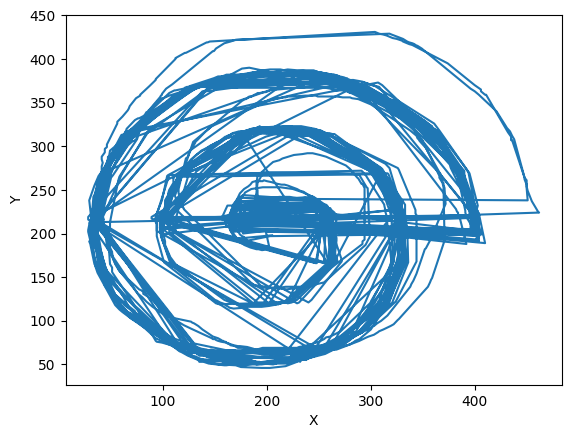

In [98]:

fig = plt.figure()
ax = fig.add_subplot(111)

#Plot combined
ax.plot(Control_result["X"], Control_result["Y"], linestyle="-")

ax.set_xlabel("X")
ax.set_ylabel("Y")


plt.show()


Parkinson

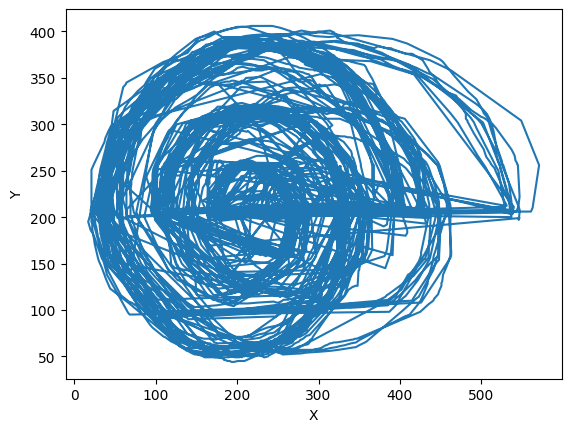

In [99]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot combined
ax.plot(Parkinson_result["X"],Parkinson_result["Y"], linestyle="-")

ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()


Grip Angle 

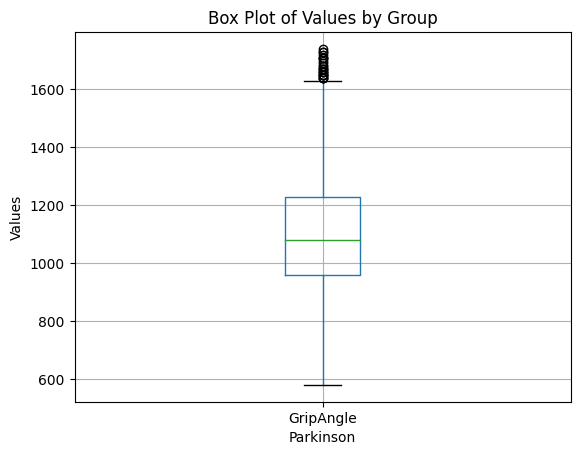

In [275]:
Parkinson_result.boxplot(column=['GripAngle'])

# Set the axis labels and title
plt.xlabel('Parkinson')
plt.ylabel('Values')
plt.title('Box Plot of Values by Group')


plt.show()


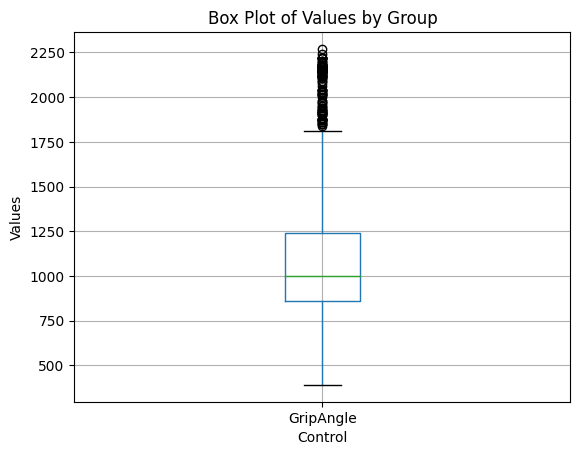

In [274]:
Control_result.boxplot(column=['GripAngle'])


plt.xlabel('Control')
plt.ylabel('Values')
plt.title('Box Plot of Values by Group')

# Show the plot
plt.show()

In [268]:
stat, pvalue = ttest_ind(Control_result['GripAngle'],Parkinson_result['GripAngle'])

print('T-test statistic:', stat)
print('p-value:', pvalue)

T-test statistic: -7.437717500120293
p-value: 1.0866791717814005e-13


Pressure

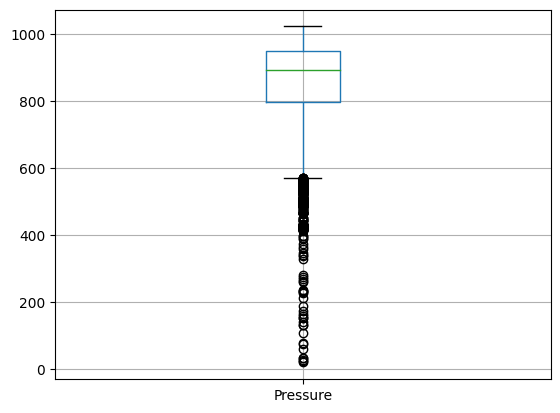

In [102]:
Control_result.boxplot(column="Pressure")

plt.show()

In [103]:
print(sum(Control_result["Pressure"])/len((Control_result["Pressure"])))   
Control_STD = Control_result["Pressure"].std()

848.19025


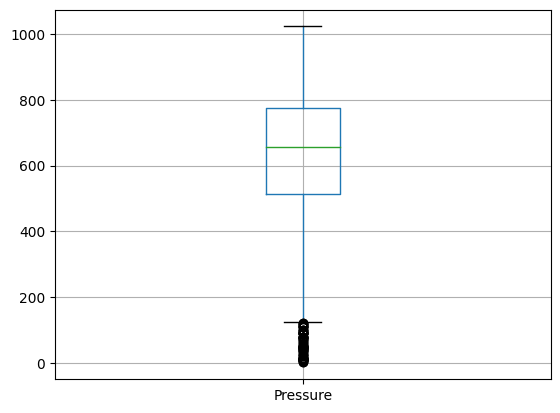

In [104]:
Parkinson_result.boxplot(column="Pressure")
plt.show()

In [105]:
print(sum(Parkinson_result["Pressure"])/len((Parkinson_result["Pressure"])))
Parkinson_std = Parkinson_result["Pressure"].std()

648.2762695624401


In [106]:
'''"Data Exploration.ipynbhypothesized_mean = 848.19025

#sample mean and standard deviation given above
sample_mean = 648.2762695624401
sample_std = Parkinson_std



#95% confidence interval 
ci = stats.t.interval(0.95, len(PD_areas)-1, loc=sample_mean, scale=sample_std/np.sqrt(len(PD_areas)))

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Hypothesized Mean: {hypothesized_mean:.2f}")
print(f"t-value: {t_value:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")'''


'"Data Exploration.ipynbhypothesized_mean = 848.19025\n\n#sample mean and standard deviation given above\nsample_mean = 648.2762695624401\nsample_std = Parkinson_std\n\n\n\n#95% confidence interval \nci = stats.t.interval(0.95, len(PD_areas)-1, loc=sample_mean, scale=sample_std/np.sqrt(len(PD_areas)))\n\n# Print the results\nprint(f"Sample Mean: {sample_mean:.2f}")\nprint(f"Hypothesized Mean: {hypothesized_mean:.2f}")\nprint(f"t-value: {t_value:.2f}")\nprint(f"p-value: {p_value:.2f}")\nprint(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")'

Image Anyalsis

Size Comparison

In [107]:
parkinson = "../Parkinsons_Data/spiral/training/parkinson/"
control = "../Parkinsons_Data/spiral/training/healthy/"

Control

In [108]:

image_dir = control
spirals = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(image_dir, filename)
        image = Image.open(filepath).convert('L') #Convert to grayscale
        spiral = np.array(image)
        spirals.append(spiral)


In [109]:

healthy_areas = []
for spiral in spirals:
    area = skimage.measure.regionprops(skimage.measure.label(spiral))[0].area
    healthy_areas.append(area)


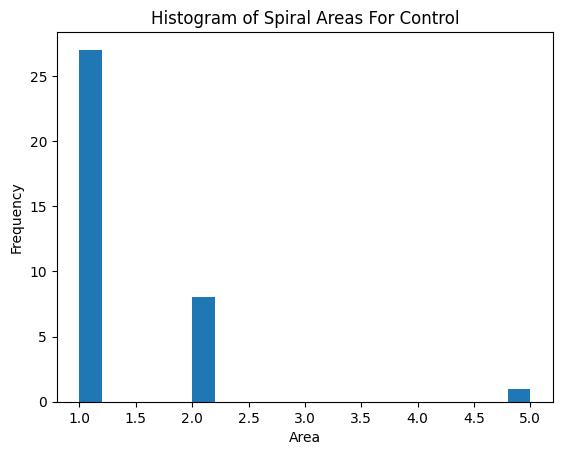

In [110]:
#Plot 
plt.hist(healthy_areas, bins=20)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Spiral Areas For Control')
plt.show()

Parkinson

In [111]:

image_dir = parkinson
spirals = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(image_dir, filename)
        image = Image.open(filepath).convert('L') #Convert to grayscale
        spiral = np.array(image)
        spirals.append(spiral)


In [112]:

PD_areas = []
for spiral in spirals:
    area = skimage.measure.regionprops(skimage.measure.label(spiral))[0].area
    PD_areas.append(area)


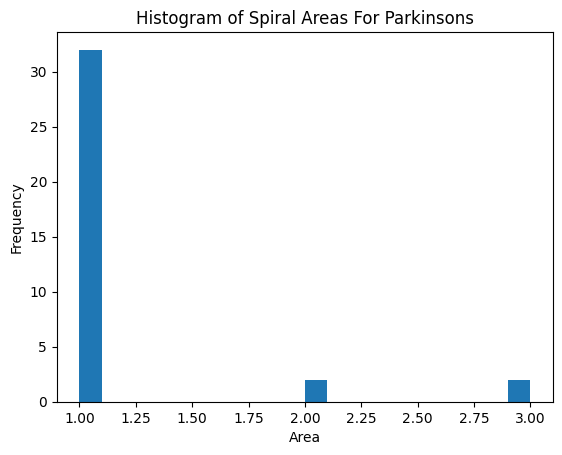

In [113]:
#Plot 
plt.hist(PD_areas, bins=20)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Spiral Areas For Parkinsons')
plt.show()

Hypothesis Testing

In [114]:
hypothesized_mean = np.mean(healthy_areas)

#null is both are equal
sample_mean = np.mean(PD_areas)
sample_std = np.std(PD_areas, ddof=1)


t_value, p_value = stats.ttest_1samp(PD_areas, hypothesized_mean)

#95% confidence interval 
ci = stats.t.interval(0.95, len(PD_areas)-1, loc=sample_mean, scale=sample_std/np.sqrt(len(PD_areas)))


print(f"Sample Mean: {sample_mean:.2f}")
print(f"Hypothesized Mean: {hypothesized_mean:.2f}")
print(f"t-value: {t_value:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")

Sample Mean: 1.17
Hypothesized Mean: 1.33
t-value: -1.97
p-value: 0.06
95% Confidence Interval: [1.00, 1.34]


Image Symmetry 

Control

In [115]:

image_dir = control
spirals = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(image_dir, filename)
        image = Image.open(filepath).convert('L') # Convert to grayscale
        spiral = np.array(image)
        spirals.append(spiral)


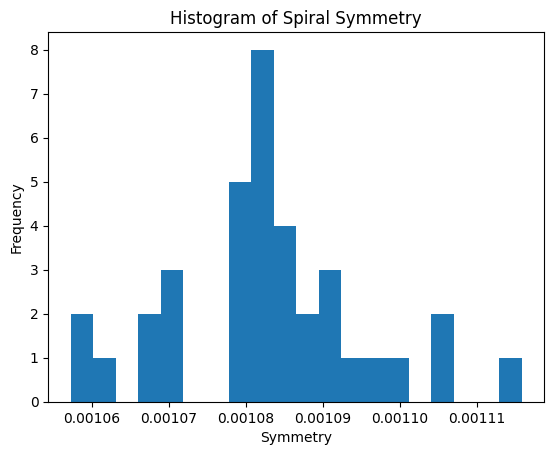

In [116]:


Healthy_symmetries = []
for spiral in spirals:

    #Using scikit finiding the centroid of the spiral
    props = skimage.measure.regionprops(skimage.measure.label(spiral))[0]
    centroid = np.array(props.centroid, dtype=int)
    
    #find the horizontal and vertical axis
    x, y = np.meshgrid(np.arange(spiral.shape[1]), np.arange(spiral.shape[0]))
    x = x.astype(int)
    y = y.astype(int)
    x_dev = x - centroid[1]
    y_dev = y - centroid[0]
    horz_axis = np.sum(x_dev * spiral) / np.sum(spiral)
    vert_axis = np.sum(y_dev * spiral) / np.sum(spiral)
    
    #math for symmetry
    x_dev_norm = (x_dev / horz_axis).astype(int)
    y_dev_norm = (y_dev / vert_axis).astype(int)
    idx = x_dev_norm * spiral.shape[0] + y_dev_norm
    unique, counts = np.unique(idx, return_counts=True)
    max_count = np.max(counts)
    symmetry = max_count / np.sum(spiral)
    Healthy_symmetries.append(symmetry)


plt.hist(Healthy_symmetries, bins=20)
plt.xlabel('Symmetry')
plt.ylabel('Frequency')
plt.title('Histogram of Spiral Symmetry')
plt.show()


Parkinson

In [117]:


image_dir = parkinson
spirals = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(image_dir, filename)
        image = Image.open(filepath).convert('L') # Convert to grayscale
        spiral = np.array(image)
        spirals.append(spiral)


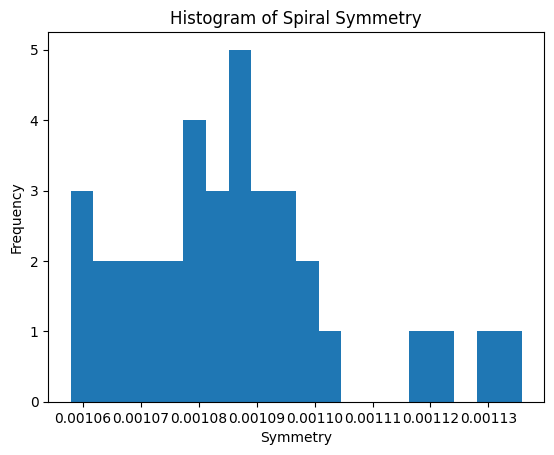

In [118]:


PD_symmetries = []
for spiral in spirals:

    #Using scikit finiding the centroid of the spiral
    props = skimage.measure.regionprops(skimage.measure.label(spiral))[0]
    centroid = np.array(props.centroid, dtype=int)
    
    #find the horizontal and vertical axis
    x, y = np.meshgrid(np.arange(spiral.shape[1]), np.arange(spiral.shape[0]))
    x = x.astype(int)
    y = y.astype(int)
    x_dev = x - centroid[1]
    y_dev = y - centroid[0]
    horz_axis = np.sum(x_dev * spiral) / np.sum(spiral)
    vert_axis = np.sum(y_dev * spiral) / np.sum(spiral)
    
    #math for symmetry
    x_dev_norm = (x_dev / horz_axis).astype(int)
    y_dev_norm = (y_dev / vert_axis).astype(int)
    idx = x_dev_norm * spiral.shape[0] + y_dev_norm
    unique, counts = np.unique(idx, return_counts=True)
    max_count = np.max(counts)
    symmetry = max_count / np.sum(spiral)
    PD_symmetries.append(symmetry)


plt.hist(PD_symmetries, bins=20)
plt.xlabel('Symmetry')
plt.ylabel('Frequency')
plt.title('Histogram of Spiral Symmetry')
plt.show()


Control

mean 0.06520607151618577


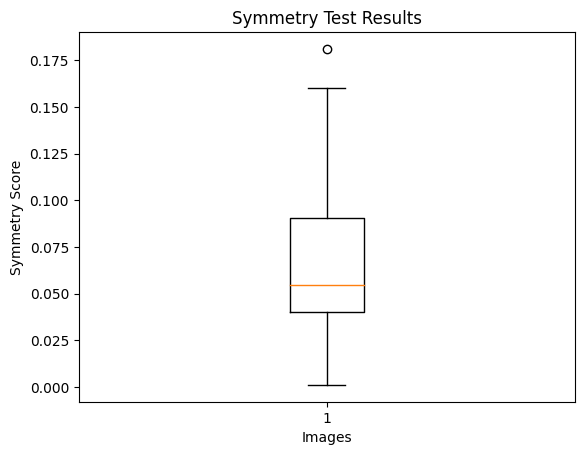

In [119]:
folder_path = control


results = []

#Loop over all image files in the folder
for filename in os.listdir(folder_path):
    
    if filename.endswith(".png"):
        #Read in the image
        image_path = os.path.join(folder_path, filename)
        image = io.imread(image_path, as_gray=True)
        
        #find the mirrors of the image
        mirror_h = np.fliplr(image)
        mirror_v = np.flipud(image)
        
        #find the correlation coefficent for each mirror 
        corr_h = np.corrcoef(image.flatten(), mirror_h.flatten())[0, 1]
        corr_v = np.corrcoef(image.flatten(), mirror_v.flatten())[0, 1]
        
        #average of the two 
        symmetry = (corr_h + corr_v) / 2
        
        results.append(symmetry)
        

print(f"mean {sum(results)/len(results)}")

plt.boxplot(results)
plt.title("Symmetry Test Results")
plt.xlabel("Images")
plt.ylabel("Symmetry Score")
plt.show()


Parkinson

mean 0.04583116076144543


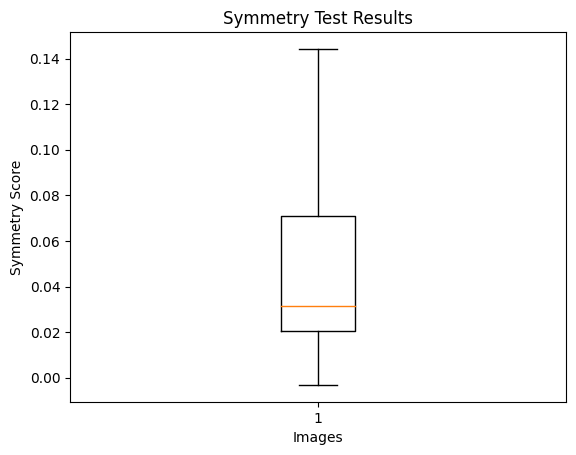

In [120]:
folder_path = parkinson


results = []

#Loop over all image files in the folder
for filename in os.listdir(folder_path):
    
    if filename.endswith(".png"):
        #Read in the image
        image_path = os.path.join(folder_path, filename)
        image = io.imread(image_path, as_gray=True)
        
        #find the mirrors of the image
        mirror_h = np.fliplr(image)
        mirror_v = np.flipud(image)
        
        #find the correlation coefficent for each mirror 
        corr_h = np.corrcoef(image.flatten(), mirror_h.flatten())[0, 1]
        corr_v = np.corrcoef(image.flatten(), mirror_v.flatten())[0, 1]
        
        #average of the two 
        symmetry = (corr_h + corr_v) / 2
        
        results.append(symmetry)
        

print(f"mean {sum(results)/len(results)}")

plt.boxplot(results)
plt.title("Symmetry Test Results")
plt.xlabel("Images")
plt.ylabel("Symmetry Score")
plt.show()


In [121]:
hypothesized_mean =0.06520607151618577

#sample mean and standard deviation given above
sample_mean = 0.04583116076144543
sample_std = 0.03695791678908361




#95% confidence interval 
ci = stats.t.interval(0.95, len(PD_areas)-1, loc=sample_mean, scale=sample_std/np.sqrt(len(PD_areas)))

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Hypothesized Mean: {hypothesized_mean:.2f}")
print(f"t-value: {t_value:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")


Sample Mean: 0.05
Hypothesized Mean: 0.07
t-value: -1.97
p-value: 0.06
95% Confidence Interval: [0.03, 0.06]


Regression

In [283]:
data = pd.DataFrame()

#Loop over all text files in the control folder
for filename in os.listdir('../PARKINSON_HW/hw_dataset/control/'):
    if filename.endswith('.txt'):
        filepath = os.path.join('../PARKINSON_HW/hw_dataset/control/', filename)
        df = pd.read_csv(filepath, delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle'])
        distances = []
        for i in range(len(df)):
            x, y = df.iloc[i]['X'], df.iloc[i]['Y']
            distance = np.sqrt(x**2 + y**2)
            distances.append(distance)

            #the trapezoid rule to calculate the area under the curve defined by the spiral
        area = trapz(distances, dx=1)
       
        df['area'] = area
        df = pd.DataFrame(df.mean()).T
        df['Parkinsons'] = 0  #Setting parkinson disease status to 0 for control subjects
        data = pd.concat([data, df], ignore_index=True)


#Loop over all text files in the parkinson folder
for filename in os.listdir('../PARKINSON_HW/hw_dataset/parkinson/'):
    if filename.endswith('.txt'):
        filepath = os.path.join('../PARKINSON_HW/hw_dataset/parkinson/', filename)
        df = pd.read_csv(filepath, delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle'])
        distances = []
        for i in range(len(df)):
            x, y = df.iloc[i]['X'], df.iloc[i]['Y']
            distance = np.sqrt(x**2 + y**2)
            distances.append(distance)

            #the trapezoid rule to calculate the area under the curve defined by the spiral
        area = trapz(distances, dx=1)
        df['area'] = area
        df = pd.DataFrame(df.mean()).T
        df['Parkinsons'] = 1  #Setting parkinson disease status to 1 for parkinson subjects
        data = pd.concat([data, df], ignore_index=True)


In [123]:
avg = 0
for i in range(1000):

    X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Parkinsons']), data['Parkinsons'], test_size=0.2)

#Fit a logistic regression model 
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

#Prediction
    y_pred = logreg.predict(X_test)

#Evaluatation
    accuracy = logreg.score(X_test, y_test)
    avg += accuracy
print("Accuracy:", avg/1000)

Accuracy: 0.73475


In [124]:
data

,X,Y,Z,Pressure,GripAngle,area,Parkinsons
0,0.579310,899.069828,721.168966,1.732641e+09,0.555517,5.214567e+06,0
1,0.653852,856.105943,841.311812,1.732496e+09,0.488628,5.834336e+06,0
2,0.735856,878.609841,924.256276,1.320031e+06,0.506807,7.034962e+06,0
3,0.737273,917.333279,997.448028,3.248959e+05,0.506302,5.603871e+06,0
4,0.606003,936.641972,742.036684,1.732882e+09,0.529776,3.932010e+06,0
5,0.662596,884.453220,852.471932,1.732719e+09,0.469766,4.490234e+06,0
6,0.655516,928.456989,862.214257,1.732826e+09,0.516527,4.662618e+06,0
7,0.246582,568.741029,1392.987837,3.753975e+06,0.577699,7.528257e+06,0
8,40.620722,674.031179,1437.933460,6.452166e+06,0.661217,1.127455e+07,0
9,51.748935,765.624649,1108.708122,1.349869e+07,0.677272,1.016810e+07,0


Correlation Analysis

In [129]:
X = data[['X', 'Y', 'Z','Pressure','GripAngle','area']] 
y = data['Parkinsons']


corr_matrix = X.corr()


print(corr_matrix)


for col in X.columns:
    corr, pval = pearsonr(X[col], y)
    print(f"Correlation between {col} and y: {corr}, p-value: {pval}")

                  X         Y         Z  Pressure  GripAngle      area
X          1.000000 -0.548038  0.375510 -0.299257   0.473256 -0.115497
Y         -0.548038  1.000000 -0.371474  0.499058  -0.504362  0.290822
Z          0.375510 -0.371474  1.000000 -0.517338   0.449728 -0.124089
Pressure  -0.299257  0.499058 -0.517338  1.000000  -0.489019 -0.075431
GripAngle  0.473256 -0.504362  0.449728 -0.489019   1.000000 -0.275964
area      -0.115497  0.290822 -0.124089 -0.075431  -0.275964  1.000000
Correlation between X and y: -0.07225652208199672, p-value: 0.6577084633617917
Correlation between Y and y: -0.3275900833314633, p-value: 0.03906629577622329
Correlation between Z and y: -0.030338539221011016, p-value: 0.8525733928631294
Correlation between Pressure and y: -0.489513310344316, p-value: 0.0013471093427191866
Correlation between GripAngle and y: 0.4014183654483588, p-value: 0.010250117482383888
Correlation between area and y: -0.17730312732520362, p-value: 0.2737335453265417


In [130]:



x = data['Pressure']
y = data['Parkinsons']

#correlation coefficient and p-value
corr, pval = pearsonr(x, y)


print("Pearson correlation coefficient:", corr)
print("p-value:", pval)

Pearson correlation coefficient: -0.489513310344316
p-value: 0.0013471093427191866


In [131]:



x = data['Z']
y = data['Parkinsons']

#correlation coefficient and p-value
corr, pval = pearsonr(x, y)


print("Pearson correlation coefficient:", corr)
print("p-value:", pval)

Pearson correlation coefficient: -0.030338539221011016
p-value: 0.8525733928631294


Number Of Times Pen Is lifted

In [133]:
minm = min(data['Z'])

minm

721.1689655172414

In [145]:

z_range = data['Z'].max() - data['Z'].min()


threshold_percent = 5

threshold = z_range * (threshold_percent / 100)

print(threshold)

61.493435889721745


In [146]:
num_lifts = len(data[data['Z'] > threshold])

print(f'The pen was lifted off the paper {num_lifts} times.')

The pen was lifted off the paper 40 times.


In [153]:
parkinson_df = data[data['Parkinsons'] == 1]


num_lifts = 0
for z in parkinson_df['Z']:
    if z > threshold + minm:
        num_lifts += 1

print(f"Number of lifts for Parkinson patients: {num_lifts}")

Number of lifts for Parkinson patients: 25


In [154]:
parkinson_df = data[data['Parkinsons'] == 0]


num_lifts = 0
for z in parkinson_df['Z']:
     if z > threshold + minm:
        num_lifts += 1

print(f"Number of lifts for Control patients: {num_lifts}")

Number of lifts for Control patients: 13


Average number of lifts

In [276]:
txt_dir = '../PARKINSON_HW/hw_dataset/Control/'

In [277]:
sum_lift = 0
Control_lift = []
for filename in os.listdir(txt_dir):
        
    if filename.endswith('.txt'):
            
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])
  
        
        num_lifts = 0
        pen_up = False  
        for z in df['Z']:
            if z > 0 and not pen_up: 
                num_lifts += 1
                pen_up = True
            elif z == 0:  
                pen_up = False
        Control_lift.append(num_lifts)
        sum_lift += num_lifts

        print(f"Number of lifts for Control patients: {num_lifts}")
print(f"The average number of lifts for Control is {sum_lift/15}")


Number of lifts for Control patients: 253
Number of lifts for Control patients: 355
Number of lifts for Control patients: 478
Number of lifts for Control patients: 340
Number of lifts for Control patients: 178
Number of lifts for Control patients: 257
Number of lifts for Control patients: 243
Number of lifts for Control patients: 223
Number of lifts for Control patients: 177
Number of lifts for Control patients: 446
Number of lifts for Control patients: 381
Number of lifts for Control patients: 170
Number of lifts for Control patients: 30
Number of lifts for Control patients: 67
Number of lifts for Control patients: 147
The average number of lifts for Control is 249.66666666666666


In [272]:
txt_dir = '../PARKINSON_HW/hw_dataset/Parkinson/'

In [273]:
sum_lift = 0
Parkinson_lift = []
for filename in os.listdir(txt_dir):
        
    if filename.endswith('.txt'):
            
        filepath = os.path.join(txt_dir, filename)
        df = pd.read_csv(filepath, delimiter=';', names=['X', 'Y', 'Z', 'Pressure', 'GripAngle', 'Timestamp', 'TestID'])

        
        num_lifts = 0
        pen_up = False  
        for z in df['Z']:
            if z > 0 and not pen_up: 
                num_lifts += 1
                pen_up = True
            elif z == 0:  
                pen_up = False
        Parkinson_lift.append(num_lifts)
        sum_lift += num_lifts

        print(f"Number of lifts for Parkinson patients: {num_lifts}")
print(f"The average number of lifts for Parkinson is {sum_lift/25}")


Number of lifts for Parkinson patients: 34
Number of lifts for Parkinson patients: 200
Number of lifts for Parkinson patients: 376
Number of lifts for Parkinson patients: 617
Number of lifts for Parkinson patients: 344
Number of lifts for Parkinson patients: 697
Number of lifts for Parkinson patients: 574
Number of lifts for Parkinson patients: 478
Number of lifts for Parkinson patients: 236
Number of lifts for Parkinson patients: 127
Number of lifts for Parkinson patients: 225
Number of lifts for Parkinson patients: 202
Number of lifts for Parkinson patients: 315
Number of lifts for Parkinson patients: 202
Number of lifts for Parkinson patients: 238
Number of lifts for Parkinson patients: 184
Number of lifts for Parkinson patients: 93
Number of lifts for Parkinson patients: 413
Number of lifts for Parkinson patients: 639
Number of lifts for Parkinson patients: 475
Number of lifts for Parkinson patients: 579
Number of lifts for Parkinson patients: 308
Number of lifts for Parkinson pati

In [260]:
Control_lift

[253, 355, 478, 340, 178, 257, 243, 223, 177, 446, 381, 170, 30, 67, 147]

In [261]:
Parkinson_lift

[34,
 200,
 376,
 617,
 344,
 697,
 574,
 478,
 236,
 127,
 225,
 202,
 315,
 202,
 238,
 184,
 93,
 413,
 639,
 475,
 579,
 308,
 648,
 246,
 351]

In [292]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Parkinsons', axis=1), data['Parkinsons'], test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


accuracy = rf.score(X_test, y_test)


print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750


In [284]:
data['lift'] = Control_lift + Parkinson_lift
data

,X,Y,Z,Pressure,GripAngle,area,Parkinsons,lift
0,0.579310,899.069828,721.168966,1.732641e+09,0.555517,5.214567e+06,0,253
1,0.653852,856.105943,841.311812,1.732496e+09,0.488628,5.834336e+06,0,355
2,0.735856,878.609841,924.256276,1.320031e+06,0.506807,7.034962e+06,0,478
3,0.737273,917.333279,997.448028,3.248959e+05,0.506302,5.603871e+06,0,340
4,0.606003,936.641972,742.036684,1.732882e+09,0.529776,3.932010e+06,0,178
5,0.662596,884.453220,852.471932,1.732719e+09,0.469766,4.490234e+06,0,257
6,0.655516,928.456989,862.214257,1.732826e+09,0.516527,4.662618e+06,0,243
7,0.246582,568.741029,1392.987837,3.753975e+06,0.577699,7.528257e+06,0,223
8,40.620722,674.031179,1437.933460,6.452166e+06,0.661217,1.127455e+07,0,177
9,51.748935,765.624649,1108.708122,1.349869e+07,0.677272,1.016810e+07,0,446


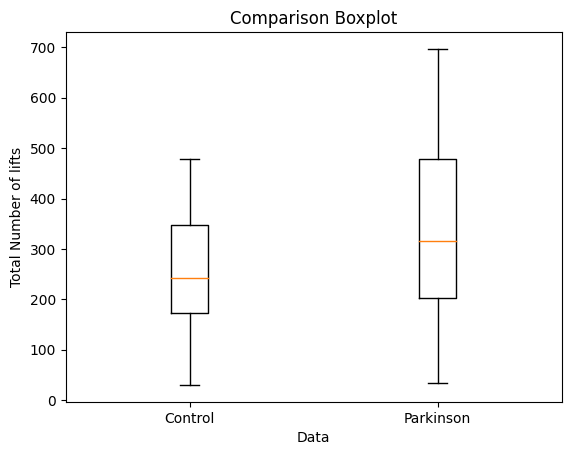

In [262]:
data_lift = [Control_lift,Parkinson_lift]
plt.boxplot(data_lift)

plt.xticks([1, 2], ['Control', 'Parkinson'])


plt.title('Comparison Boxplot')
plt.xlabel('Data')
plt.ylabel('Total Number of lifts')


plt.show()

In [263]:
'''z_scores = np.abs((Parkinson_lift - np.mean(Parkinson_lift)) / np.std(Parkinson_lift))


threshold = 1.5


Parkinson_lift = [x for i, x in enumerate(Parkinson_lift) if z_scores[i] <= threshold]
z_scores = [x for x in z_scores if x <= threshold]'''

'z_scores = np.abs((Parkinson_lift - np.mean(Parkinson_lift)) / np.std(Parkinson_lift))\n\n\nthreshold = 1.5\n\n\nParkinson_lift = [x for i, x in enumerate(Parkinson_lift) if z_scores[i] <= threshold]\nz_scores = [x for x in z_scores if x <= threshold]'

In [264]:
#z_scores

In [265]:
'''z_scores = np.abs((Control_lift - np.mean(Control_lift)) / np.std(Control_lift))


threshold = 1


Control_lift = [x for i, x in enumerate(Control_lift) if z_scores[i] <= threshold]
z_scores = [x for x in z_scores if x <= threshold]'''

'z_scores = np.abs((Control_lift - np.mean(Control_lift)) / np.std(Control_lift))\n\n\nthreshold = 1\n\n\nControl_lift = [x for i, x in enumerate(Control_lift) if z_scores[i] <= threshold]\nz_scores = [x for x in z_scores if x <= threshold]'

In [266]:
#z_scores

In [267]:
stat, pvalue = ttest_ind(Parkinson_lift,Control_lift)

print('T-test statistic:', stat)
print('p-value:', pvalue)

T-test statistic: 1.8384701912245733
p-value: 0.07381891619464954


Random Forest 

In [291]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Parkinsons', axis=1), data['Parkinsons'], test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


accuracy = rf.score(X_test, y_test)


print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750
